In [11]:
#import h5py
import numpy as np
import matplotlib.pyplot as plt;
from skimage.measure import regionprops

In [2]:
# Load data
data = np.load('../bin/inputs_all_red.npz')
inputs_all = data['inputs_all']

data = np.load('../bin/label_stack.npz')
label_stack = data['label_stack']

data = np.load('../bin/results_all_red.npz')
results_all_red = data['results_all_red']

### Tracking network output

Text(0.5, 1.0, 'Daughter')

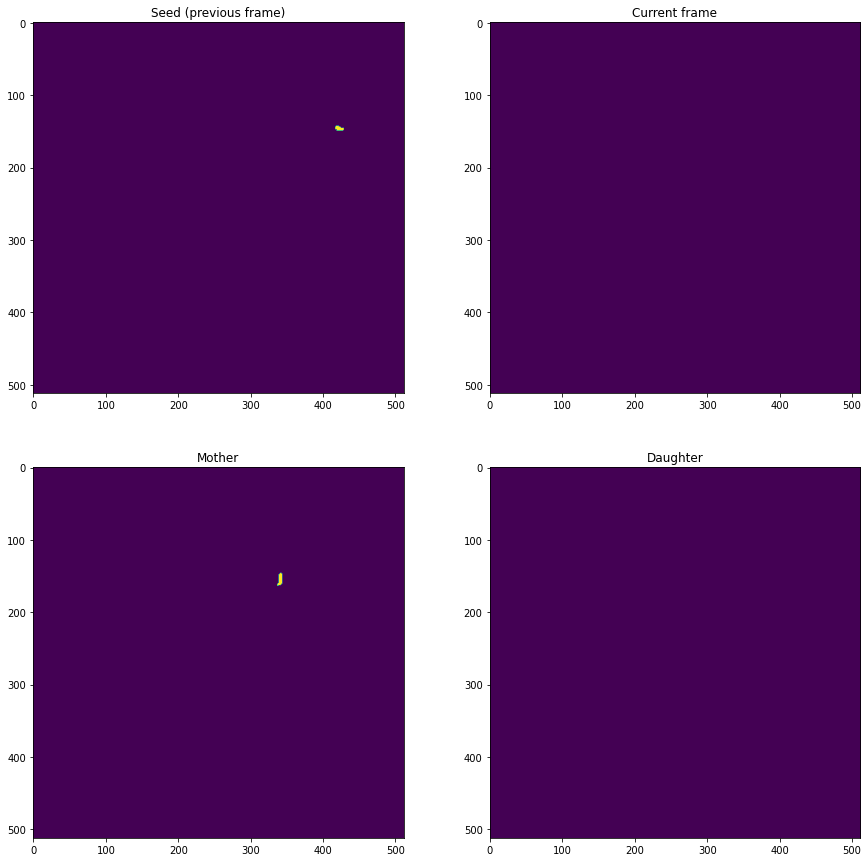

In [4]:
frame = 33
cell_ix = 29

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(inputs_all[frame][:,:,1]==cell_ix)
plt.title('Seed (previous frame)')
plt.subplot(2,2,2)
plt.imshow(inputs_all[frame][:,:,3]==cell_ix)
plt.title('Current frame')
plt.subplot(2,2,3)
plt.imshow(results_all_red[frame,:,:,0]==(cell_ix+1))
plt.title('Mother')
plt.subplot(2,2,4)
plt.imshow(results_all_red[frame,:,:,1]==(cell_ix+1))
plt.title('Daughter')

## Lineages

### Labeled cells

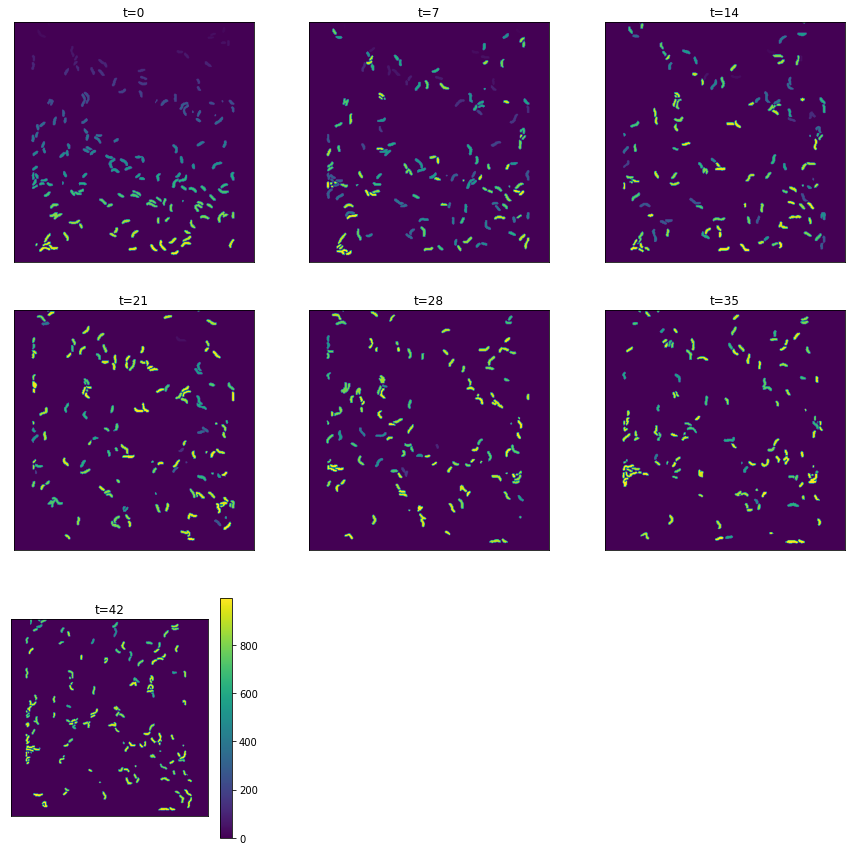

In [5]:
timeframes = np.arange(len(label_stack))
plt.figure(figsize = (15,15))
for i, l in enumerate(label_stack[::7]):
    plt.subplot(3,3,i+1)
    plt.imshow(l, vmin=label_stack.min())
    plt.title('t='+str(timeframes[::7][i]))
    plt.xticks([])
    plt.yticks([])
plt.colorbar()

In [6]:
num_time_steps = len(label_stack)

def compute_area(cell_id):
    areas = []
    for i in range(num_time_steps-2):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            areas.append(regs_cell[0].area)
        except IndexError:
            areas.append(0)
    areas = np.array(areas)
    return areas

def compute_length(cell_id):
    lengths = []
    for i in range(num_time_steps-2):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            lengths.append(regs_cell[0].major_axis_length)
        except IndexError:
            lengths.append(0)
    lengths = np.array(lengths)
    return lengths

In [7]:
# Compute features

area = compute_area(cell_id = 151)
length = compute_length(cell_id = 151)

Text(0.5, 0, 'Time frame')

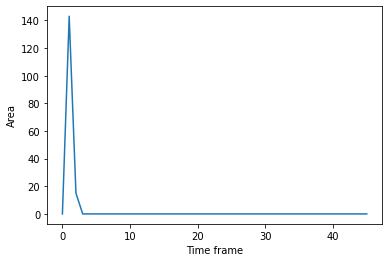

In [8]:
plt.plot(area)
plt.ylabel('Area')
plt.xlabel('Time frame')

Text(0.5, 0, 'Time frame')

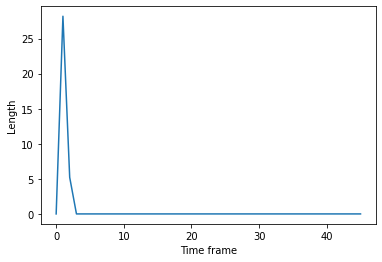

In [9]:
plt.plot(length)
plt.ylabel('Length')
plt.xlabel('Time frame')